In [1]:
import matplotlib.pyplot as plt
import numpy as np

print(plt.style.available)
from pytdscf.util import read_nc
from pytdscf import units

plt.style.use("bmh")

# Make all new figures/axes transparent by default
plt.rcParams["figure.facecolor"] = "none"  # or (1, 1, 1, 0)
plt.rcParams["axes.facecolor"] = "none"

plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Latin Modern Roman"],
        "mathtext.fontset": "cm",  # still fine; there is no LMR math in mathtext
    }
)
plt.rcParams.update(
    {
        "text.usetex": True,
        # Tell LaTeX to load any package you like
        "text.latex.preamble": r"\usepackage{amssymb}",
    }
)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/Users/hinom/GitHub/radicalpair-tensornetwork/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = read_nc("dnp_chi128_cutoff0.1_eq_B0.05_angle0pi_over_8_n4_arnoldi_prop/reduced_density.nc", [(i,i) for i in range(27)])

In [3]:
SCALE = 1e-09
time = data["time"] * SCALE * 1e09 / units.au_in_fs
time

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
       27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  ,
       29.25, 29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75, 31.  , 31.25,
       31.5 , 31.75]

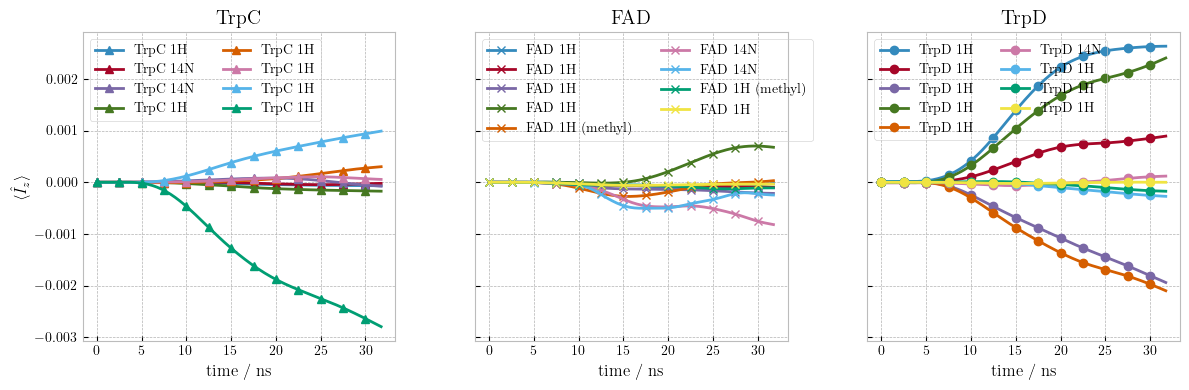

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
ax_map = {"TrpC": axes[0], "FAD": axes[1], "TrpD": axes[2]}
for mol, ax in ax_map.items():
    ax.set_title(mol)

def get_mol_marker(i: int):
    if i < 8:
        return "TrpC", "^"
    elif i < 18:
        return "FAD", "x"
    else:
        return "TrpD", "o"

def compute_y(i: int):
    rdm = data[(i, i)]
    match rdm.shape[1:]:
        case (2, 2):
            return 0.5 * (rdm[:, 0, 0].real - rdm[:, 1, 1].real)
        case (3, 3):
            #return None
            return (rdm[:, 0, 0].real - rdm[:, 2, 2].real)
        case (6, 6):
            return (1/3)*(
                1.5*rdm[:, 0, 0].real + 0.5*rdm[:, 1, 1].real
                -0.5*rdm[:, 2, 2].real -1.5*rdm[:, 3, 3].real
                +0.5*rdm[:, 4, 4].real -0.5*rdm[:, 5, 5].real
            )
        case _:
            return None

# --- 共通 ylim を計算 ---
ymin, ymax = np.inf, -np.inf
for i in range(27):
    y = compute_y(i)
    if y is None:
        continue
    ymin = min(ymin, np.nanmin(y))
    ymax = max(ymax, np.nanmax(y))

pad = 0.05 * (ymax - ymin) if np.isfinite(ymax - ymin) and (ymax > ymin) else 1.0
ylim = (ymin - pad, ymax + pad)

# --- プロット ---
for i in range(27):
    mol, marker = get_mol_marker(i)
    ax = ax_map[mol]

    y = compute_y(i)
    if y is None:
        continue

    match data[(i, i)].shape[1:]:
        case (2,2):
            label = f"{mol} 1H"
        case (6,6):
            label = f"{mol} 1H (methyl)"
        case (3,3):
            label = f"{mol} 14N"
    ax.plot(time, y, label=label, marker=marker, markevery=10)

# --- 体裁 ---
for ax in axes:
    ax.set_ylim(*ylim)
    ax.set_xlabel("time / ns")
    ax.legend(loc="upper left", ncol=2)

axes[0].set_ylabel(r"$\langle \hat{I}_z \rangle$")

fig.tight_layout()
plt.show()

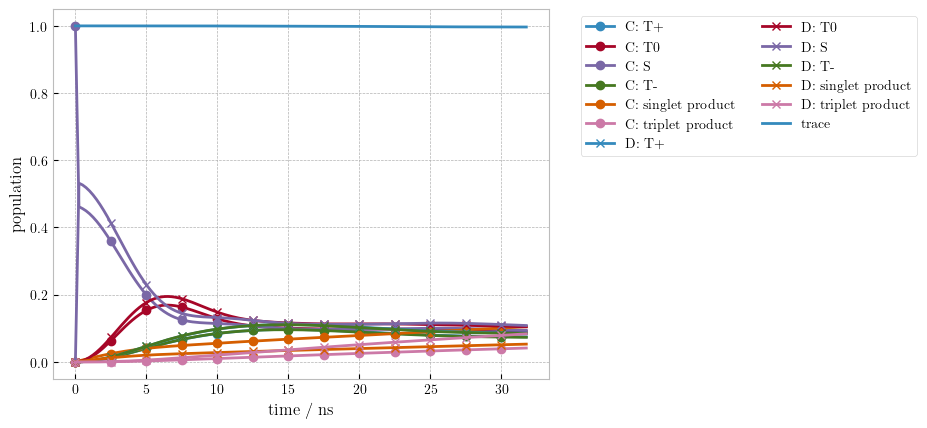

In [6]:
names = {
    0: "C: T+",
    1: "C: T0",
    2: "C: S",
    3: "C: T-",
    4: "C: singlet product",
    5: "C: triplet product",
    6: "D: T+",
    7: "D: T0",
    8: "D: S",
    9: "D: T-",
    10: "D: singlet product",
    11: "D: triplet product",
}
for i in range(12):
    plt.plot(time, data[(13,13)][:, i, i].real, label=names[i], marker="o" if i < 6 else "x", color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i%6], markevery=10)

plt.plot(time, np.einsum("tii->t", data[(13,13)].real), label="trace", markevery=10)
plt.xlabel("time / ns")
plt.ylabel("population")
plt.legend(ncol=2, bbox_to_anchor=(1.05, 1))
plt.show()